# advanced Exploratory Data Analysis
## Corporate Tax Cut Project

In [1]:
import pandas as pd
import missingno as mn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [20, 10]

### Transferred "CEO Pay and Employment Data at Tax-Dodging Corporations" table from Appendix 1 from Report A into `ips_appendix1`

In [2]:
ips_appendix1 = pd.read_csv('ips_appendix1.csv')
ips_appendix1.columns = ['Company Name', 'Profit ($mil 2008-2015)', 'Fed Tax Paid ($mil 2008-2015)', 'Effective Tax Rate (% 2008-2015)','Employee count (# end of 2016)', 'Difference in employee count (# 2008-2016)','Adjusted percent change (% 2008-2016)', 'CEO compensation ($ 2016)', 'CEO compensation % change (2008-2016)']
ips_appendix1.index = ips_appendix1['Company Name']
ips_appendix1.drop(ips_appendix1.columns[0], axis = 1, inplace=True)
ips_appendix1.head()

,Profit ($mil 2008-2015),Fed Tax Paid ($mil 2008-2015),Effective Tax Rate (% 2008-2015),Employee count (# end of 2016),Difference in employee count (# 2008-2016),Adjusted percent change (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016)
Company Name,,,,,,,,
AT&T,141624,11500,8.1,268000,-79450,-23,28433716,146
Verizon,81518,7401,9.1,160900,-78450,-33,17674579,-5
ExxonMobil,60482,8227,13.6,72700,-37735,-34,27393567,22
United Technologies,24421,2546,10.4,201600,-37000,-16,15831335,-12
JPMorgan Chase,114770,17956,15.6,243000,-26961,-10,27236892,39


### Transferred "Effective Federal Corporate Income Tax Rates on 258 Major Corporations, 2008–2015 (alphabetical)" table from Report B into `itep_tax_rates_B`

In [3]:
itep_tax_rates_B = pd.read_csv('itep_tax_rates.csv', na_values=['NaN'])
itep_tax_rates_B.columns= ['Company Name', 'Profit ($mil Eight Year Total)', 'Tax ($mil Eight Year Total)',
       'Rate (% Eight Year Total)', 'Profit ($mil 2015)', 'Tax ($mil 2015)', 'Rate (% 2015)',
       'Profit ($mil 2014)', 'Tax ($mil 2014)', 'Rate (% 2014)', 'Profit ($mil 2013)',
       'Tax ($mil 2013)', 'Rate (% 2013)', 'Profit ($mil 2008-12)', 'Tax ($mil 2008-12)',
       'Rate (% 2008-12)']
itep_tax_rates_B.index = itep_tax_rates_B['Company Name']
itep_tax_rates_B.drop(itep_tax_rates_B.columns[0], axis = 1, inplace=True)
itep_tax_rates_B.head()

,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),Tax ($mil 2013),Rate (% 2013),Profit ($mil 2008-12),Tax ($mil 2008-12),Rate (% 2008-12)
Company Name,,,,,,,,,,,,,,,
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,871.9,28.0,12589.9,2813.1,22.3
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,15.3,15.7,431.0,35.0,8.1
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,189.3,33.3,2528.7,671.4,26.6
Aetna,22564.1,7290.8,32.3,4133.0,1753.1,42.4,3423.0,1198.8,35.0,2899.2,832.9,28.7,12108.8,3505.9,29.0
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,166.0,35.4,1781.2,11.2,0.6


### Transferred "U.S. Profits & U.S. Federal Income Taxes versus Foreign Profits & Foreign Income Taxes, 2008-15 for companies with foreign pretax profits at least 10% of total worldwide pretax profits, \$-million" table from Report B into `itep_foreign_B`

In [4]:
itep_foreign_B = pd.read_csv('itep_foreign.csv')
itep_foreign_B.columns = ['Company Name', 'US profit', 'US tax', 'US rate', 'Foreign profit', 'Foreign tax',
                          'Foreign rate', 'US rate - Foreign rate']
itep_foreign_B.index = itep_foreign_B['Company Name']
itep_foreign_B.drop(itep_foreign_B.columns[0], axis = 1, inplace=True)
itep_foreign_B.head()

,US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate
Company Name,,,,,,,
Wal-Mart Stores,145059,48796,33.6,42692,11562,27.1,6.6
General Electric,40375,-1051,-2.6,85495,27726,32.4,-35.0
J.P. Morgan Chase & Co.,121544,24731,20.3,59592,12935,21.7,-1.4
McKesson,11973,2766,23.1,4811,576,12.0,11.1
International Business Machines,66753,6874,10.3,86183,21639,25.1,-14.8


### Transferred industry categorization data from "3 Effective Federal Corporate Income Tax Rates on 258 Major Corporations, 2008–2015 by Industry" table from Report B into `itep_corp_indust_B`

In [14]:
itep_corp_indust_B = pd.read_csv('itep_corp_indust.csv')
itep_corp_indust_B.columns = ['Company Name', 'Industry']
itep_corp_indust_B.index = itep_corp_indust_B['Company Name']
itep_corp_indust_B.drop(itep_corp_indust_B.columns[0], axis = 1, inplace=True)
itep_corp_indust_B.head()

,Industry
Company Name,
Boeing,Aerospace & defense
United Technologies,Aerospace & defense
Rockwell Collins,Aerospace & defense
L-3 Communications,Aerospace & defense
Raytheon,Aerospace & defense


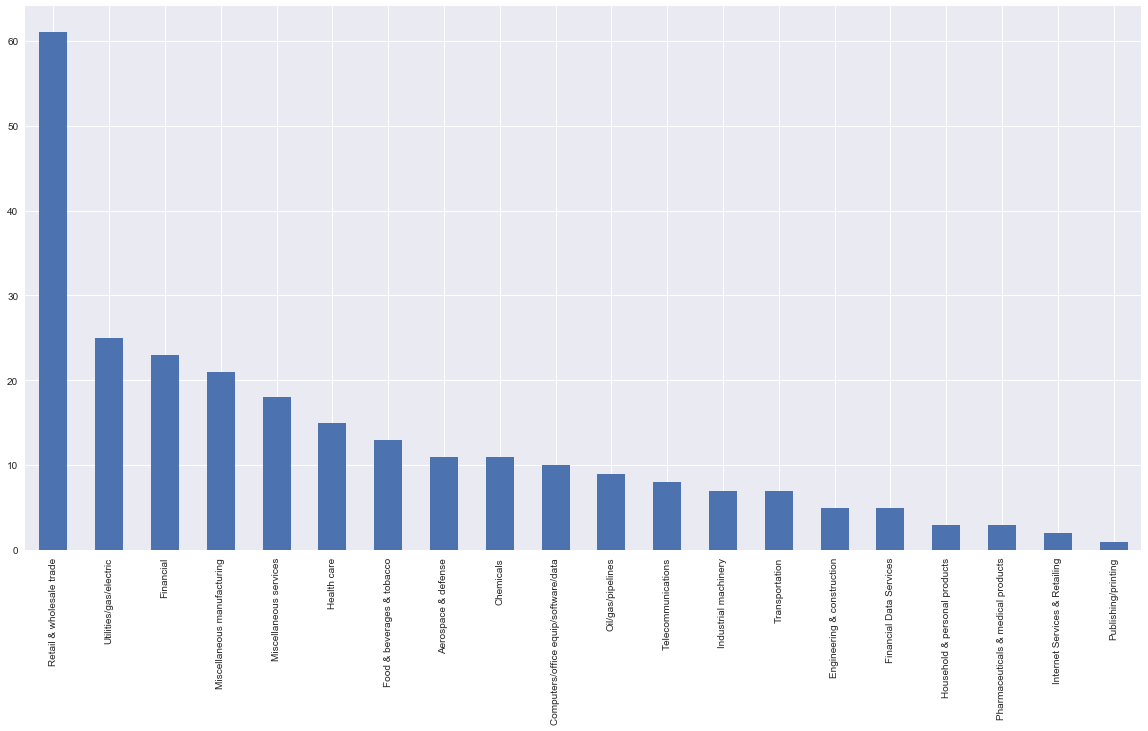

In [28]:
itep_corp_indust_B['Industry'].value_counts().plot(kind='bar')

## Creating one table containing all data for each company:

### Current tables:
- `ips_appendix1`
- `itep_tax_rates_B`
- `itep_foreign_B`
- `itep_corp_indust_B`

### All companies:
- Profit
- Tax
- Rate (US)
- Industry
- Story

### Some companies:
- Employee Change %
- CEO compensation change %
- Rate (Foreign)

#### Creating new `master_table`

In [16]:
master_table = itep_tax_rates_B.copy()

#### Merging `ips_appendix1` with `master_table`

In [17]:
ips_appendix1.index.difference(master_table.index)

Index(['IBM', 'WEC', 'Wyndham Worldwide'], dtype='object', name='Company Name')

In [18]:
ips_appendix1.rename({'21st Century Fox': 'Twenty-First Century Fox',
                       'Commty Health Systems': 'Community Health Systems',
                       'ExxonMobil': 'Exxon Mobil',
                        'JPMorgan Chase': 'J.P. Morgan Chase & Co.',
                        'PNC Financial Services': 'PNC Financial Services Group',
                        'Public Service Enterprise': 'Public Service Enterprise Group',
                        'Reinsurance Grp of Amer': 'Reinsurance Group of America',
                        'Travelers': 'Travelers Cos.',
                        'Verizon': 'Verizon Communications'}, inplace=True)

master_table.rename({'International Business Machines': 'IBM',
                     'Wisconsin Energy': 'WEC',
                     'Wyndham Worldwide Corporation':'Wyndham Worldwide'}, inplace=True)

master_table = pd.concat([master_table, ips_appendix1[['Employee count (# end of 2016)','Difference in employee count (# 2008-2016)','Adjusted percent change (% 2008-2016)','CEO compensation ($ 2016)', 'CEO compensation % change (2008-2016)']]], axis=1)

In [19]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),Tax ($mil 2013),Rate (% 2013),Profit ($mil 2008-12),Tax ($mil 2008-12),Rate (% 2008-12),Employee count (# end of 2016),Difference in employee count (# 2008-2016),Adjusted percent change (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016)
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,871.9,28.0,12589.9,2813.1,22.3,NaN,NaN,NaN,NaN,NaN
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,15.3,15.7,431.0,35.0,8.1,110000.0,-2500.0,-2.0,3837985.0,37.0
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,166.0,35.4,1781.2,11.2,0.6,NaN,NaN,NaN,NaN,NaN
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,3043.0,15.8,86087.7,4352.4,5.1,268000.0,-79450.0,-23.0,28433716.0,146.0
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,189.3,33.3,2528.7,671.4,26.6,NaN,NaN,NaN,NaN,NaN


#### Merging `itep_foreign_B` with `master_table`

In [20]:
itep_foreign_B.index.difference(master_table.index)

Index([], dtype='object')

In [21]:
itep_foreign_B.rename({'Gamestop': 'GameStop',
                       'International Business Machines': 'IBM',
                       'Wyndham Worldwide Corporation': 'Wyndham Worldwide'}, inplace=True)
master_table = pd.concat([master_table, itep_foreign_B], axis=1)

In [13]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,Adjusted percent change (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,NaN,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,-2.0,3837985.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,-23.0,28433716.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Merging `itep_corp_indust_B` with `master_table`

In [23]:
itep_corp_indust_B.index.difference(master_table.index)

Index(['International Business Machines', 'Wisconsin Energy',
       'Wyndham Worldwide Corporation'],
      dtype='object')

In [24]:
itep_corp_indust_B.rename({'International Business Machines': 'IBM',
                     'Wisconsin Energy': 'WEC',
                     'Wyndham Worldwide Corporation':'Wyndham Worldwide'}, inplace=True)
master_table = pd.concat([master_table, itep_corp_indust_B], axis=1)

In [25]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,CEO compensation ($ 2016),CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8,Miscellaneous manufacturing
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,3837985.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miscellaneous services
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,28433716.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail & wholesale trade


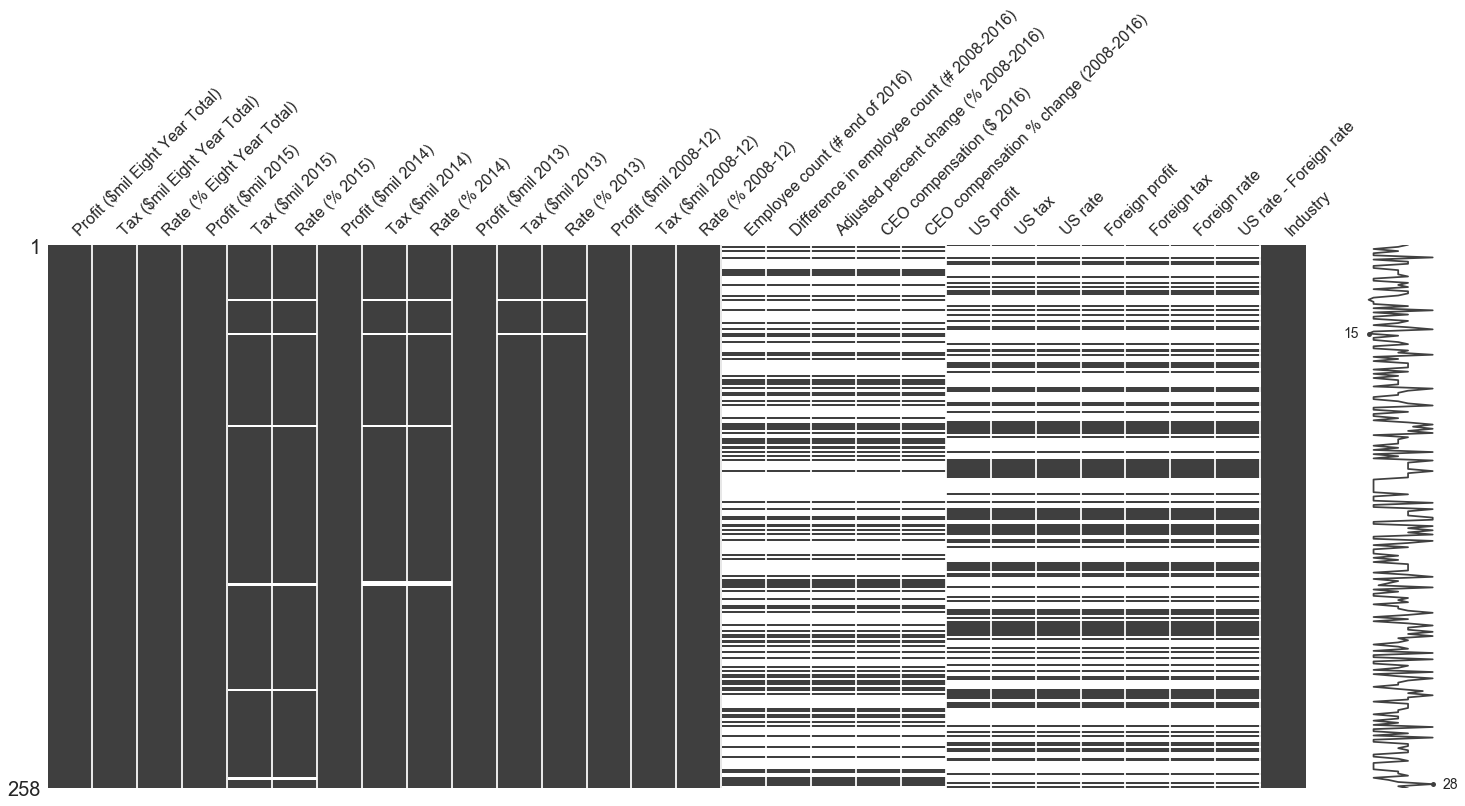

In [26]:
mn.matrix(master_table)